**CHECKING GPU STATUS**

In [ ]:
!nvidia-smi

Wed Mar  5 02:36:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


**LOAD IMAGE AND MASK DATA**

In [ ]:
import numpy as np
import os

# Mount Google Drive (if running on Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


# Define paths to your saved arrays
base_path = "/content/drive/My Drive/DSGP_Ravisha/target/target"

train_images_path = os.path.join(base_path, "training/numpy/images.npy")
train_masks_path = os.path.join(base_path, "training/numpy/masks.npy")

val_images_path = os.path.join(base_path, "validation/numpy/images.npy")
val_masks_path = os.path.join(base_path, "validation/numpy/masks.npy")

test_images_path = os.path.join(base_path, "testing/numpy/images.npy")
test_masks_path = os.path.join(base_path, "testing/numpy/masks.npy")

X_train = np.load(train_images_path)
Y_train = np.load(train_masks_path)

X_val = np.load(val_images_path)
Y_val = np.load(val_masks_path)

X_test = np.load(test_images_path)
Y_test = np.load(test_masks_path)

print(f"Training images shape: {X_train.shape}")
print(f"Training masks shape: {Y_train.shape}")
print(f"Validation images shape: {X_val.shape}")
print(f"Validation masks shape: {Y_val.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing masks shape: {Y_test.shape}")


MessageError: Error: credential propagation was unsuccessful

**IMAGE PREPROCESSING AND AUGMENTATION**

Mounted at /content/drive
 Number of images loaded: 98
 Number of masks loaded: 98
Mounted at /content/drive
 Datasets saved successfully in Google Drive at: /content/drive/My Drive/DSGP_Ravisha/Dataset_Splits/


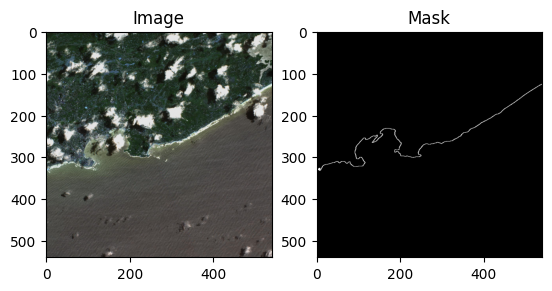

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import Sequence

# Mount Google Drive (if running on Google Colab)
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Function to load images and masks
def load_images_and_masks(image_folder, mask_folder, target_size=(540, 540)):
    image_files = sorted(os.listdir(image_folder))  # Get all image filenames
    mask_files = sorted(os.listdir(mask_folder))    # Get all mask filenames

    images = []
    masks = []

    for img_file in image_files:
        # Skip if file is not a jpg image
        if not img_file.endswith('.jpg'):
            continue

        # Construct corresponding mask file name (same name as image, but .png extension)
        mask_file = img_file.replace('.jpg', '.png')  # Change extension from .jpg to .png

        # Check if corresponding mask file exists
        if mask_file in mask_files:
            img_path = os.path.join(image_folder, img_file)
            mask_path = os.path.join(mask_folder, mask_file)

            # Read the image and the mask
            image = cv2.imread(img_path)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read mask in grayscale

            if image is not None and mask is not None:
                # Resize images and masks to the target size
                image = cv2.resize(image, target_size)
                mask = cv2.resize(mask, target_size)

                images.append(image)
                masks.append(mask)
            else:
                print(f" Error: Failed to load image or mask for {img_file}")
        else:
            print(f" Mask not found for image: {img_file}")

    # Convert lists to numpy arrays
    X = np.array(images)
    Y = np.array(masks)

    return X, Y

# Define paths to the folders containing images and masks
image_folder = "/content/drive/My Drive/DSGP_Ravisha/sattelite IMAGES/"
mask_folder = "/content/drive/My Drive/DSGP_Ravisha/png/NSM/"

# Load images and masks
X, Y = load_images_and_masks(image_folder, mask_folder)

# Check if the dataset is loaded properly
if X.shape[0] == 0 or Y.shape[0] == 0:
    raise ValueError(" Error: Dataset is empty. Check file paths and formats.")

print(f" Number of images loaded: {X.shape[0]}")
print(f" Number of masks loaded: {Y.shape[0]}")

# Normalize images (if necessary, depending on the model)
X = X / 255.0

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

import os
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Optional: Further split training set into validation set (10% of training data)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

# Define save directory in Google Drive
save_dir = "/content/drive/My Drive/DSGP_Ravisha/Dataset_Splits/"
os.makedirs(save_dir, exist_ok=True)  # Create directory if not exists

# Save the datasets as .npy files
np.save(os.path.join(save_dir, "X_train.npy"), X_train)
np.save(os.path.join(save_dir, "Y_train.npy"), Y_train)
np.save(os.path.join(save_dir, "X_test.npy"), X_test)
np.save(os.path.join(save_dir, "Y_test.npy"), Y_test)
np.save(os.path.join(save_dir, "X_val.npy"), X_val)
np.save(os.path.join(save_dir, "Y_val.npy"), Y_val)

print(" Datasets saved successfully in Google Drive at:", save_dir)


# Data Augmentation for training images
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(X_train)

# Visualize a sample image and its mask
index = 0
plt.subplot(1, 2, 1)
plt.imshow(X_train[index])
plt.title("Image")
plt.subplot(1, 2, 2)
plt.imshow(Y_train[index], cmap='gray')
plt.title("Mask")
plt.show()

# Now X_train, Y_train, X_test, and Y_test are ready for training.
# You can proceed with model training using these arrays.

# Define a custom data generator to handle resizing
class ImageMaskGenerator(Sequence):
    def __init__(self, images, masks, batch_size, target_size=(540, 540)):
        self.images = images
        self.masks = masks
        self.batch_size = batch_size
        self.target_size = target_size
        self.indexes = np.arange(len(self.images))

    def __len__(self):
        return int(np.floor(len(self.images) / self.batch_size))

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = [self.images[i] for i in batch_indexes]
        batch_masks = [self.masks[i] for i in batch_indexes]

        # Resize images and masks
        batch_images_resized = np.array([cv2.resize(img, self.target_size) for img in batch_images])
        batch_masks_resized = np.array([cv2.resize(mask, self.target_size) for mask in batch_masks])

        return batch_images_resized, batch_masks_resized

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

# Create the data generators
train_gen = ImageMaskGenerator(X_train, Y_train, batch_size=2)
val_gen = ImageMaskGenerator(X_test, Y_test, batch_size=2)


Hyper Parameter Tuning

In [2]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.5 MB/s eta 0:00:00


In [6]:
import keras_tuner as kt  #  Use updated import
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# ✅ Define loss functions inside the function or import them
def dice_loss(y_true, y_pred):
    smooth = 1.0
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def focal_loss(y_true, y_pred, gamma=2., alpha=0.25):
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    y_true = tf.cast(y_true, tf.float32)
    cross_entropy = -y_true * tf.math.log(y_pred)
    loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
    return tf.reduce_mean(loss)

#  Fix 'input_shape' deprecation warning
def build_model(hp):
    model = models.Sequential()

    model.add(layers.Input(shape=(540, 540, 3)))  # ✅ Use `shape=` instead of `input_shape=`

    # Tune filter size
    filters = hp.Choice('filters', values=[32, 64, 128])

    # Encoder
    model.add(layers.Conv2D(filters, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(filters * 2, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(filters * 4, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Decoder
    model.add(layers.Conv2DTranspose(filters * 4, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(filters * 2, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(filters, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    model.add(layers.Cropping2D(((2, 2), (2, 2))))  # Ensure output size is 540x540
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    # Tune learning rate
    lr = hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])
    optimizer = Adam(learning_rate=lr)

    # Tune loss function
    loss_fn = hp.Choice('loss_function', values=['dice_loss', 'focal_loss'])

    if loss_fn == 'dice_loss':
        loss = dice_loss
    else:
        loss = focal_loss

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model


In [16]:
from tensorflow.keras import backend as K
from keras_tuner.tuners import RandomSearch

# Clear any previous sessions to release memory
K.clear_session()

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,  # Try 10 different models
    executions_per_trial=1,  # Train each model once
    directory='tuner_results',
    project_name='segnet_tuning'
)

#  Train the tuner
batch_size = 1
tuner.search(X_train, Y_train, epochs=10, validation_split=0.2, batch_size=batch_size)

#  Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Learning Rate: {best_hps.get('learning_rate')}")
print(f"Best Filters: {best_hps.get('filters')}")
print(f"Best Loss Function: {best_hps.get('loss_function')}")

# Clear any previous sessions to release memory before training final model
K.clear_session()

#  Train final model with best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, Y_train, epochs=50, validation_split=0.2, batch_size=batch_size)


Reloading Tuner from tuner_results/segnet_tuning/tuner0.json
Best Learning Rate: 0.001
Best Filters: 64
Best Loss Function: dice_loss
Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - accuracy: 0.0406 - loss: -0.0083 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - accuracy: 1.6644e-05 - loss: -0.1055 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 1.5307e-05 - loss: -0.0975 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 1.6922e-05 - loss: -0.0950 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 1.5320e-05 - loss: -0.0994 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 1.6567e-05 - loss: -0.0949 - val_accuracy: 1.8616e-05 - val_loss: -0.1183
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/st

BUILDING THE MODEL

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer
import tensorflow as tf


def create_segnet_model(input_shape=(540, 540, 3)):
    model = models.Sequential()

    # Encoder (Downsampling)
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Decoder (Upsampling)
    model.add(layers.Conv2DTranspose(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
    model.add(layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Adjust the last Conv2DTranspose layer
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))

    # Apply Cropping to Ensure Output is Exactly 540x540
    model.add(layers.Cropping2D(((2, 2), (2, 2))))  # Crop excess pixels evenly

    # Output Layer: 1 channel, same size as input (540, 540)
    model.add(layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return model


# Loss Functions
def dice_loss(y_true, y_pred):
    smooth = 1.0
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return 1 - (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)


def focal_loss(y_true, y_pred, gamma=2., alpha=0.25):
    epsilon = tf.keras.backend.epsilon()
    y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
    y_true = tf.cast(y_true, tf.float32)
    cross_entropy = -y_true * tf.math.log(y_pred)
    loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
    return tf.reduce_mean(loss)


# Create model
model = create_segnet_model()

# Compile model
learning_rate = 0.0005  # Recommended starting point 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=dice_loss, metrics=['accuracy'])  # Change loss if needed

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 540, 540, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 270, 270, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 270, 270, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 135, 135, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 135, 135, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 68, 68, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 136, 136, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 272, 272, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 544, 544, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cropping2d_2 (Cropping2D)            │ (None, 540, 540, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 540, 540, 1)         │             577 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,330,305 (5.07 MB)

 Trainable params: 1,330,305 (5.07 MB)

 Non-trainable params: 0 (0.00 B)

**TRAINING THE MODEL**

In [ ]:
# Ensure TensorFlow runs on GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU:", gpus[0])
    except RuntimeError as e:
        print(e)

history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=50,
    batch_size=2
)


# Save the trained model
model.save('/content/drive/MyDrive/DSGP_Ravisha/segnet_model.h5')  # Change the path if needed
print("Model saved successfully!")


Physical devices cannot be modified after being initialized
Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - accuracy: 0.0433 - loss: 0.0741 - val_accuracy: 1.4746e-05 - val_loss: -0.1153
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 1.6710e-05 - loss: -0.1129 - val_accuracy: 1.4746e-05 - val_loss: -0.1157
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 1.6575e-05 - loss: -0.1032 - val_accuracy: 1.4746e-05 - val_loss: -0.1970
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.0286 - loss: -0.2008 - val_accuracy: 0.4463 - val_loss: -0.2501
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.5745 - loss: -0.2676 - val_accuracy: 0.5788 - val_loss: -0.2839
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.6064 - loss: -0.2750 - val_accuracy: 0.6612 - val_loss: -0.2978
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6664 - loss: -0.2959 - val_accuracy: 0.6825 - val_loss: -0.3085
Epoch 8/50

Model saved successfully!


In [ ]:
# For predicting on the test data
predictions = model.predict(X_test)  # X_test should have the same shape as the input images


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 756ms/step


**CONVERTING MODEL PREDICTIONS TO BINARY MASKS**

In [ ]:
# Convert probabilities to binary (0 or 1) using a threshold
binary_predictions = (predictions > 0.5).astype(np.uint8)


**GENERATE CLASSIFICATION REPORT**

In [ ]:
from sklearn.metrics import classification_report

# Flatten both the predicted and true masks
y_test_flat = Y_test.flatten()
predictions_flat = binary_predictions.flatten()

# Generate the classification report
report = classification_report(y_test_flat, predictions_flat)
print(report)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99   5794683
           1       0.00      0.97      0.00        86
           2       0.00      0.00      0.00       134
           3       0.00      0.00      0.00       101
           4       0.00      0.00      0.00       132
           5       0.00      0.00      0.00        99
           6       0.00      0.00      0.00       153
           7       0.00      0.00      0.00        82
           8       0.00      0.00      0.00        81
           9       0.00      0.00      0.00       100
          10       0.00      0.00      0.00        94
          11       0.00      0.00      0.00       106
          12       0.00      0.00      0.00       102
          13       0.00      0.00      0.00        84
          14       0.00      0.00      0.00        65
          15       0.00      0.00      0.00        60
          16       0.00      0.00      0.00        67
          17       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**VISUALISING INPUT,GROUND TRUTH AND THE PREDICTED MASKS**

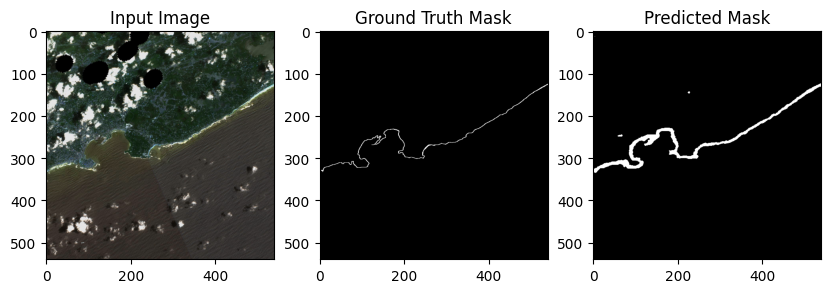

In [ ]:
import matplotlib.pyplot as plt

# Pick a random index to visualize the output
index = 7 # You can change this index to visualize different images

plt.figure(figsize=(10, 5))

# Show the input image
plt.subplot(1, 3, 1)
plt.imshow(X_test[index])
plt.title("Input Image")

# Show the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(Y_test[index], cmap='gray')
plt.title("Ground Truth Mask")

# Show the predicted mask
plt.subplot(1, 3, 3)
plt.imshow(binary_predictions[index].squeeze(), cmap='gray')
plt.title("Predicted Mask")

plt.show()


✅ Image loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


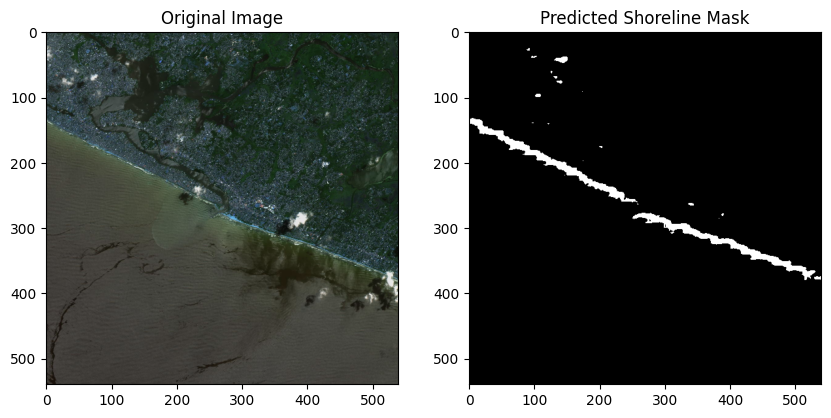

In [ ]:
import cv2
from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
# Load the new image (replace 'new_image.jpg' with your image file)
#new_image_path = "/content/drive/My Drive/DSGP_Ravisha/sentinel2_void_2018-12-17_Unawatuna.jpg"
new_image_path="/content/sentinel2_void_2019-03-22_Panadura.jpg"
new_image = cv2.imread(new_image_path)

# Check if the image is loaded correctly
if new_image is None:
    print("❌ Error: Failed to load the new image.")
else:
    print("✅ Image loaded successfully.")

# Resize the new image to match the input size (e.g., 540x540)
target_size = (540, 540)
new_image_resized = cv2.resize(new_image, target_size)

# Normalize the new image
new_image_normalized = new_image_resized / 255.0

# Add an extra dimension to match the model input shape (batch size, height, width, channels)
new_image_input = np.expand_dims(new_image_normalized, axis=0)

# Use the trained model to predict the shoreline (mask) for the new image
predicted_mask = model.predict(new_image_input)

# Squeeze the predicted mask to remove the extra batch dimension
predicted_mask = np.squeeze(predicted_mask, axis=0)

# Threshold the predicted mask (if necessary) to obtain a binary mask
thresholded_mask = (predicted_mask > 0.5).astype(np.uint8)

# Visualize the new image and its predicted shoreline mask
plt.figure(figsize=(10, 5))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(new_image_resized)
plt.title("Original Image")

# Show the predicted mask (shoreline)
plt.subplot(1, 2, 2)
plt.imshow(thresholded_mask, cmap='gray')
plt.title("Predicted Shoreline Mask")

plt.show()


**LOAD THE TRAINED MODEL**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from tensorflow.keras.models import load_model

model_path = "/content/drive/My Drive/DSGP_Ravisha/segnet_model.h5"  # Adjust path if needed
model = load_model(model_path)

print(" Model loaded successfully!")


Mounted at /content/drive


✅ Model loaded successfully!


**LOAD THE TEST DATA**

In [ ]:
image_folder = "/content/drive/My Drive/DSGP_Ravisha/sattelite IMAGES/"
mask_folder = "/content/drive/My Drive/DSGP_Ravisha/png/NSM/"

# Load test images and masks
X, Y = load_images_and_masks(image_folder, mask_folder)

# Normalize the test images
X_test = X / 255.0
Y_test = Y  # Keep masks unchanged (assumed binary)

print(f" Test images loaded: {X_test.shape[0]}")
print(f" Test masks loaded: {Y_test.shape[0]}")


 Test images loaded: 98
 Test masks loaded: 98


In [ ]:
predictions = model.predict(X_test)  # Get predicted segmentation maps


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 477ms/step


In [ ]:
threshold = 0.5  # Adjust if necessary
predictions_binary = (predictions > threshold).astype(np.uint8)


**EVALUATE PERFORMANCE**

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Convert grayscale masks (0-255) to binary (0 or 1) using a threshold of 127
y_test_binary = (Y_test > 127).astype(np.uint8)
predictions_binary = (predictions > 0.5).astype(np.uint8)  # Ensure predictions are also binary

# Flatten both arrays for classification report
y_test_flat = y_test_binary.flatten()
predictions_flat = predictions_binary.flatten()

# Debugging step: Check unique values to confirm only 0 and 1 exist
print("Unique values in y_test_flat:", np.unique(y_test_flat))
print("Unique values in predictions_flat:", np.unique(predictions_flat))

# Generate the classification report
report = classification_report(y_test_flat, predictions_flat, target_names=['Background', 'Shoreline'])
print(report)


Unique values in y_test_flat: [0 1]
Unique values in predictions_flat: [0 1]
              precision    recall  f1-score   support

  Background       1.00      0.98      0.99  28436474
   Shoreline       0.22      0.99      0.36    140326

    accuracy                           0.98  28576800
   macro avg       0.61      0.99      0.68  28576800
weighted avg       1.00      0.98      0.99  28576800



In [ ]:
def iou_score(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    union = np.logical_or(y_true, y_pred).sum()
    return intersection / union if union != 0 else 0

iou = iou_score(y_test_flat, predictions_flat)
print(f"IoU for Shoreline Class: {iou:.4f}")


IoU for Shoreline Class: 0.2222


In [ ]:
def dice_coefficient(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred).sum()
    return (2. * intersection) / (y_true.sum() + y_pred.sum())

dice = dice_coefficient(y_test_flat, predictions_flat)
print(f"Dice Coefficient for Shoreline Class: {dice:.4f}")


Dice Coefficient for Shoreline Class: 0.3636


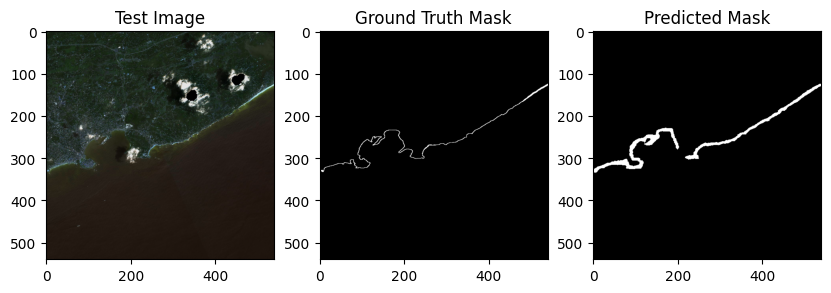

In [ ]:
import matplotlib.pyplot as plt

index = 0  # Select any test sample

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(X_test[index])  # Original image
plt.title("Test Image")

plt.subplot(1, 3, 2)
plt.imshow(Y_test[index], cmap='gray')  # Ground truth
plt.title("Ground Truth Mask")

plt.subplot(1, 3, 3)
plt.imshow(predictions_binary[index], cmap='gray')  # Predicted mask
plt.title("Predicted Mask")

plt.show()